The purpose of this project is to conduct EDA on a TikTok data set. 
Then and create visualizations and do hypothesis testing.

In [1]:

# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# load dataset 
data = pd.read_csv("/Users/saim/Desktop/tiktok.csv")


In [3]:
# display and examine the first few rows 
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
#size of the data

data.size

232584

In [5]:
#shape of the data
data.shape

(19382, 12)

In [6]:
#basic information about the data

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
#table of descriptive statistics

data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


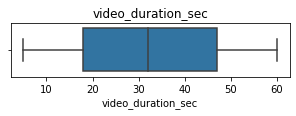

In [8]:
# create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec']);


In [9]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in ./opt/anaconda3/lib/python3.8/site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


In [13]:
#find the max duration sec
data['video_duration_sec'].max()

60

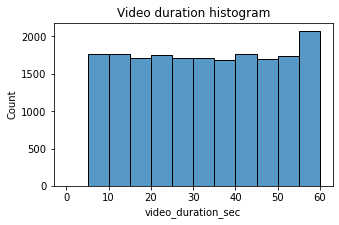

In [14]:
# create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');


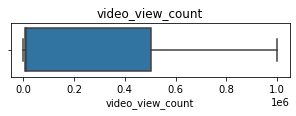

In [15]:
# create a boxplot for  `video_view_count`
plt.figure(figsize=(5, 1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count']);

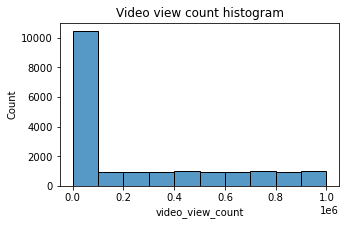

In [16]:
# create a histogram for further explore the distribution
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram');

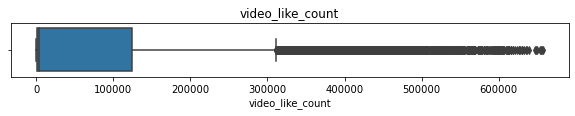

In [17]:
# create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count']);


TypeError: got an unexpected keyword argument 'labels'

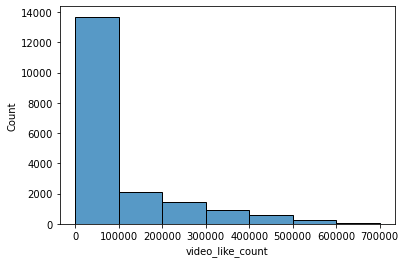

In [18]:
# create a histogram
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');


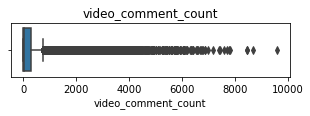

In [19]:
# create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count']);

In [23]:
data['video_comment_count'].value_counts()

0.0       3434
1.0       2222
2.0       1097
3.0        788
4.0        545
          ... 
6086.0       1
1325.0       1
1494.0       1
3543.0       1
4629.0       1
Name: video_comment_count, Length: 2424, dtype: int64

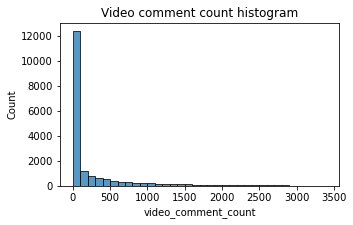

In [24]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3500),100))
plt.title('Video comment count histogram');

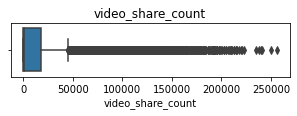

In [25]:
# create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count']);

In [27]:
data['video_share_count'].max()

256130.0

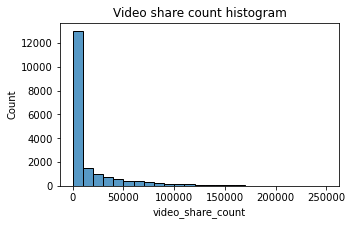

In [28]:
#create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(260000),10000))
plt.title('Video share count histogram');

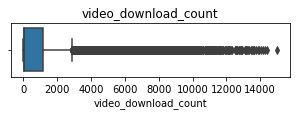

In [29]:
#create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count']);


In [32]:
data['video_download_count'].max()

14994.0

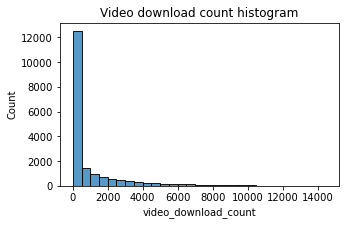

In [33]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15000),500))
plt.title('Video download count histogram');

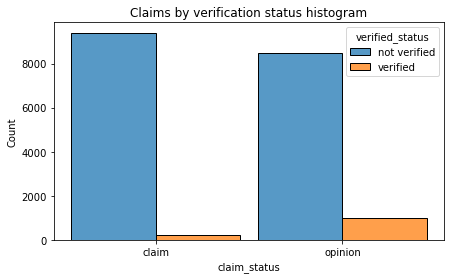

In [34]:
#claim status by verification status
#create a histogram with four bars:each combination of claim status and verification status.
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

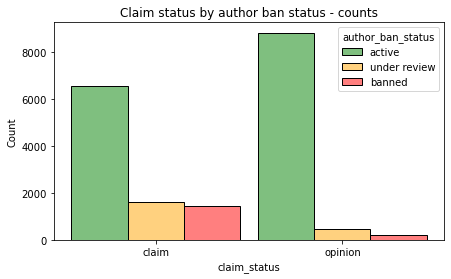

In [35]:
#claim status by author ban status
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');


In [36]:
#median view counts by ban status

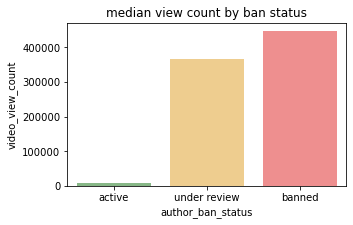

In [38]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('median view count by ban status');

In [40]:
#calculate the median view count for claim status.
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

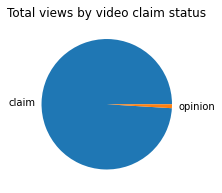

In [41]:
#total views by claim status

fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');


# hypothesis testing starts here

In [42]:
# check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [43]:
# drop rows with missing values
data = data.dropna(axis = 0)

In [44]:
# compute the mean `video_view_count` for each group in `verified_status' verified 
#or not verified
data.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

Null hypothesis: There is no difference in the number of views between 
tikTok videos' verified accounts and unverified accounts 

Alternative hypothesis: There is a difference in the number of views between 
TikTok videos posted verified accounts and posted by unverified

In [46]:
# conduct a two-sample t-test to compare means and 5% significant levels chosen
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

In [47]:
# implement a t-test using the two samples.
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

Since the p-value is smaller (smaller than the significance level of 5%), we reject 
the null hypothesis. 
As a result, there is a statistically significant difference in the mean video view 
count between verified and unverified accounts on TikTok.